<a href="https://colab.research.google.com/github/andrnha/Intelligente_systemer/blob/master/Intelligente_systemer_HWA_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
#import csv
import pandas as pd

In [68]:
#Upload
from google.colab import files
files.upload()

Saving Salary_Data.csv to Salary_Data (12).csv


{'Salary_Data.csv': b'YearsExperience,Annual Salary(Naira)\r\n0,487500.00\r\n1.1,1310537.50\r\n1.3,1396312.50\r\n1.5,1290387.50\r\n2,1362812.50\r\n2.2,1317387.50\r\n2.9,1526775.00\r\n3,1570625.00\r\n3.2,1499312.50\r\n3.2,1624312.50\r\n3.7,1533612.50\r\n3.9,1608975.00\r\n4,1516175.00\r\n4,1530712.50\r\n4.1,1532262.50\r\n4.5,1582637.50\r\n4.9,1667975.00\r\n5.1,1644112.50\r\n5.3,1857350.00\r\n5.9,1835787.50\r\n6,1993000.00\r\n6.8,1965475.00\r\n7.1,2047162.50\r\n7.9,2085025.00\r\n8.2,2241400.00\r\n8.7,2186637.50\r\n9,2138525.00\r\n9.5,2280862.50\r\n9.6,2226687.50\r\n10.3,2348637.50\r\n10.5,2342150.00\r\n'}

In [157]:
#Data preprocessing
df = pd.read_csv('Salary_Data.csv',skiprows=0)
#print(df)

#data = df.values.tolist()
#print(data)

df_experience = df[['YearsExperience']]
df_salary = df[['Annual Salary(Naira)']]

experience = df_experience.values.tolist()
experience = np.transpose(experience)
experience = experience[0]
#print(experience)
salary = df_salary.values.tolist()
salary = np.transpose(salary)
salary = salary[0]
#print(salary)

In [169]:
#Adaline
# y = w1*x1 + w2*x2 + b
# J(w)=0.5*sum(t_i - y_i)^2 -> function of weights equals half of the error squeared

class Adaline(object):

  def __init__(self, epochs = 100, eta = 0.1):
    self.epochs = epochs
    self.eta = eta

  def train(self, training_inputs, training_labels):
    x = training_inputs
    t = training_labels
    self.cost = []
    self.w = np.random.rand(len(training_inputs)+1)
    for i in range(self.epochs):
      net = np.dot(x, self.w[1]) + self.w[0]
      error = t - net
      self.w[1:] += self.eta * (np.dot(error, x)).mean()
      self.w[0] += self.eta * error.mean()
      cost = 0.5 * (error**2).sum()
      self.cost.append(cost)
    return self

  def predict(self, inputs):
    net = np.dot(inputs,self.w[1]) + self.w[0]
    return(net)

258379480950.64044
[1053819.83243988  131008.2195364   131007.90330296  131008.49169523
  131008.6082186   131008.34652763  131008.20854851  131007.83870005
  131008.77134932  131008.40929564  131008.1192209   131008.26827868
  131008.11222431  131008.78261493  131008.4990054   131008.32956709
  131008.22097565  131008.61942439  131008.34541394  131008.20550176
  131007.9896847   131008.30443336  131007.85783039  131008.41508585
  131008.17500848  131008.20023123  131008.36822582  131008.78721931
  131008.54561007  131008.21559081  131008.18844032  131008.54282432]


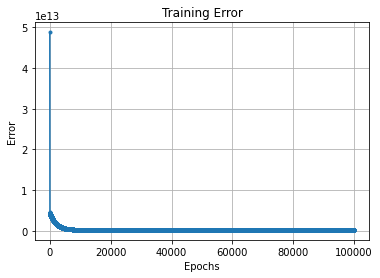

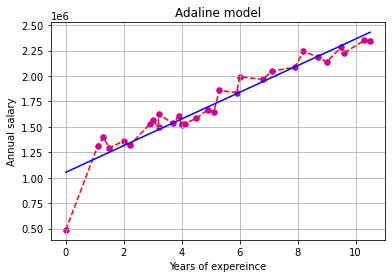

In [177]:
#Model

model = Adaline(epochs=100000, eta=0.001)
model.train(experience, salary)
y_pred = model.predict(x)

print(model.cost[-1])
print(model.w)

plt.plot(range(1,len(model.cost)+1), model.cost, marker='.')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error')
plt.grid()
plt.show()

plt.plot(x, y, 'r--', x, y_pred,'b-')
plt.scatter(x, y, color = "m", marker = "o", s = 30) 
plt.xlabel('Years of expereince')
plt.ylabel('Annual salary')
plt.title('Adaline model')
plt.grid()
plt.show()